In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
df=pd.DataFrame(np.random.randn(5,3), columns=["c1","c2","c3"])
df
# 0,0에 NaN 지정
df.ix[0,0]=None
df

In [ ]:
df.ix[1,["c1","c3"]]=None
df.ix[2,["c2"]]=None
df.ix[3,["c2"]]=None
df.ix[4,["c2"]]=None
df
# NaN이 들어간 자리를 0으로 채우기
df.fillna(0)

In [ ]:
df.mean()
df.fillna(df.mean())

# where 함수
# dataframe에서 null이 아닌 값들에 대해서 평균을 구하고 방향은 columns으로 해라
df.where(pd.notnull(df), df.mean(), axis="columns") # 각 columns들의 평균값으로 nan을 채워라
df.fillna(df.mean()["c1"]) # C1의 평균값으로 nan을 채워라

In [ ]:
arr=np.array([1,2,3,10,20,30,0.1,0.2])
np.min(arr)
# arr.min()

np.argmin(arr) # argmin -> 최소값의 index
np.argmax(arr) # argmax -> 최대값의 index
np.where(arr<1) # where 함수는 조건문 사용 -> 출력값:인덱스
np.where(arr>=10, 0, arr) # np.where(조건, 참, 거짓) => 10보다 크면 0으로 그렇지 않으면 arr값 그대로
np.where(arr>=10, arr*0.1, arr)

In [ ]:
df.fillna(df.mean()["c1":"c2"]) # c1의 평균값으로 c1의 nan값을, c2의 평균값으로 c2의 nan값을 대체함

In [11]:
df=pd.DataFrame({'c1':[1,2,3,4,5], 'c2':[6,7,8,9,10]})
df.ix[[1,3],["c2"]]=np.nan
# c2p 열에는 c2열 값이 notnull이면 c2열 값을
# c2열 값이 null이면 c1열 값으로 채우고자 함
# df['c2p']      
df["c2p"]=np.where(pd.notnull(df["c2"])==True, df["c2"], df["c1"])
df

for i in df.index:
    if pd.notnull(df.ix[i,"c2"])==True:
        df.ix[i,"c2p"]=df.ix[i,"c2"]
    else:
        df.ix[i,"c2p"]=df.ix[i,"c1"]

df

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [9]:
df

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [12]:
# dropna 메서드 : 열(axis=1)/행(axis=0) 제거
df=pd.DataFrame({'c1':[1,2,3,4,5], 'c2':[6,7,8,9,10]})
df.ix[[1,3],["c2"]]=np.nan
df

,c1,c2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [16]:
df.dropna(axis=0)
df.dropna(axis=1)
df[["c1","c2"]].dropna() # df.dropna(axis=0) 
# axis=0 default

,c1,c2
0,1,6.0
2,3,8.0
4,5,10.0


In [31]:
# 결측값 보간(interpolate)
"""
시계열데이터에 대해 선형적으로 비례하는 값
이미지 보간 : 그라데이션과 비슷
"""

from datetime import datetime
# datetime 모듈에 있는 datetiem 함수
dateStr=["1/13/2020","1/16/2020","1/17/2020","1/20/2020"]
dates=pd.to_datetime(dateStr) #to_datetime -> datetime 형태로 변환시켜주는 것
dates

DatetimeIndex(['2020-01-13', '2020-01-16', '2020-01-17', '2020-01-20'], dtype='datetime64[ns]', freq=None)

In [32]:
ts=pd.Series([1,np.nan,np.nan,10], index=dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [33]:
tslr=ts.interpolate(method="values")
# method=values: 선형적으로 비례하게 결측값 보간
tslr

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17     6.142857
2020-01-20    10.000000
dtype: float64

In [35]:
tsTime=ts.interpolate(method="time", limit=1)
tsTime

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17          NaN
2020-01-20    10.000000
dtype: float64

In [ ]:
# na를 대체 : fillna, replace
# fillna : na를 다른 값으로 대체
# replace : na뿐만 아니라 다른 모든 값들에 대해서도 대체 가능
# 결측값 / 실측값 대상 데이터 교체


In [42]:
s=pd.Series([1,2,3,1,np.nan])
s
# replace : 결측값 / 실측값 변경
s.replace(3,9)
s.replace(np.nan,5)

s.replace([1,2,3],[6,7,8])
s.replace([1,2,3,np.nan],[10,20,30,99])

0    10.0
1    20.0
2    30.0
3    10.0
4    99.0
dtype: float64

In [46]:
s
s.replace({1:5,3:30,np.nan:99}) # {} -> 딕셔너리 형태면 key가 원래값, value가 변경값

0     5.0
1     2.0
2    30.0
3     5.0
4    99.0
dtype: float64

In [51]:
# 데이터프레임에서 replace를 적용
df=pd.DataFrame({"c1":["aaa","b","c","d"],
                 "c2":[1,2,3,4],
                 "c3":[5,6,7,np.nan]
                })
df.replace({"c1":"aaa"},{"c1":"bbb"})
df.replace({"c3":np.nan},{"c3":99})

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,99.0


In [ ]:
# 병합 : 중복 데이터 발생
# 중복 데이터 여부 확인 : duplicated()
# 중복데이터 처리 : drop 한개만 남겨놓고 나머지는 제거

In [60]:
df=pd.DataFrame({
    "k1":['b','b','b','c','c'],
    "k2":['x','y','y','x','z'],
    'k3':[10,20,30,40,50]
})
df

,k1,k2,k3
0,b,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [55]:
df.duplicated(['k1'])
df.duplicated(['k2'])
df.duplicated(['k1','k2'])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [63]:
df.duplicated(['k1'],keep="first") # keep="first" 맨 처음에 나온걸 키값으로 잡겠다, 두번째부터 중복으로 처리함 이게 default
df.duplicated(['k1'],keep="last")
df.duplicated(['k1'],keep=False) # 중복된 값은 모두 True
df.duplicated(["k1"],keep="first")
df

,k1,k2,k3
0,b,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [67]:
df
# 중복값 제거(1개만 살리고 나머지 중복은 제거)
df.drop_duplicates(["k1"], keep="first")
df.drop_duplicates(["k1"], keep="last")
df.drop_duplicates(["k1"], keep=False)

,k1,k2,k3


In [71]:
# 유일한 값: unique()
# 유일한 값 개수 세기 : value_counts()

df=pd.DataFrame({
    'a':['a1','a1','a2','a2','a3'],
    'b':['b1','b1','b2','b2',np.nan],
    'c':[1,1,3,4,4]
})
df

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [74]:
df["a"].unique()
df["b"].unique() # NaN도 unique한 값으로 봄
df["c"].unique()

array([1, 3, 4], dtype=int64)

In [85]:
# value_counts : 유일값 개수 세기, pandas의 series에 있기 때문에 열단위로 count함
# help(pd.Series.value_counts)
# normalize = 디폴트(False) : 개수, True:상대비율로 출력이 됨
df['a'].value_counts(normalize=False)
# df['a'].value_counts(normalize=True)
# sort=True : 개수를 기준 정렬, False면 유일한 값을 기준으로 정렬
df['a'].value_counts(normalize=False, sort=True, ascending=False) # ascending=True: 개수를 기준으로 오름차순 정렬

a1    2
a2    2
a3    1
Name: a, dtype: int64

In [91]:
df["c"].value_counts(sort=True, ascending=False)
# 유일한 값의 개수를 기준으로 내림차순 정렬
df['c'].value_counts(sort=True, ascending=True)
df['c'].value_counts(sort=False)
# 정렬 기준이 없음

1    2
3    1
4    2
Name: c, dtype: int64

In [92]:
df

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [94]:
df["b"].value_counts(dropna=False)
# default : dropna=True => NaN을 빼고 나머지를 count한다

b2     2
b1     2
NaN    1
Name: b, dtype: int64

In [101]:
df["c"] # 1 1 3 4 4
df["c"].value_counts(bins=[0,1,2,3,4,5], sort=False)
# bins -> 구간
# ( ) : 개구간, [ ] : 폐구간
res = pd.cut(df['c'], bins=[0,1,2,3,4,5])
pd.value_counts(res)
# 동일한 결과를 도출하는 코드
# res = pd.cut(df['c'], bins=[0,1,2,3,4,5])
# pd.value_counts(res)

(3, 4]    2
(0, 1]    2
(2, 3]    1
(4, 5]    0
(1, 2]    0
Name: c, dtype: int64

In [102]:
# 변수들 간 척도가 다른 경우 데이터 표준화
# 모집단 : 전체 집단, 모집단에서 표본 추출 -> 
# 표본집단 평균, 표준편차...=> 통게량 => 모평균, 모분산(모수 : 모평균, 모분산, parameter) 추정
"""
모수적방법
중심극한정리 : 무작위로 복원추출하면, 연속형 자료의 평균에 대한 분포는 정규분포를 띈다면 
- 30개 이상의 표본에 대해서 정규분포를 따른다.

비모수적방법
- 10개 미만의 표본의 경우에는 모수적 방법을 사용할 수 없다.
- 자료를 크기로 나열-> 순위 매김 => 차이 비교

"""

'\n모수적방법\n중심극한정리 : 무작위로 복원추출하면, 연속형 자료의 평균에 대한 분포는 정규분포를 띈다면 \n- 30개 이상의 표본에 대해서 정규분포를 따른다.\n\n비모수적방법\n- 10개 미만의 표본의 경우에는 모수적 방법을 사용할 수 없다.\n\n'

In [ ]:
"""
표준화 : (각데이터-평균) / 표준편차
모집단이 정규분포를 따르는 경우에
평균 : 0, 표준편차:1 인 표준정규분포로 표준화하는 작업
1) numpy 
2) scipy.stats:zscore 
3) skylearn.prerocsssing 이용
"""

In [103]:
from numpy import *

In [106]:
data=np.random.randint(30,size=(6,5))
data

array([[28, 12, 28, 21,  6],
       [10,  0, 16,  1,  9],
       [ 0,  1, 26,  3, 11],
       [ 8, 26, 14, 24, 12],
       [26,  7,  0,  8, 23],
       [ 8, 21, 26, 23,  5]])

In [123]:
data

array([[0, 0],
       [0, 4],
       [3, 4]])

In [137]:
data=np.random.randint(6, size=(3,2))
# 전체 평균 : np.mean(data)
np.mean(data, axis=0) # 각 열에 대한 평균

np.mean(data, axis=1) # 각 행에 대한 평균

# 표준편차 = np.std()
# 표준화 = (각 데이터 - 평균(각 열)) / std(각 열)

# broadcasting
# 원데이터가 1차원 데이터였는데 확장되어서 2차원, 3차원으로 복사되는것

print(data)
print("="*30)
print("평균")
print(np.mean(data, axis=0))
print("="*30)
# print(data-np.mean(data, axis=0)) broadcasting
# np.std(data) 전체 dta에 대한 표준편차
std_data=(data-np.mean(data, axis=0)) / np.std(data, axis=0)
print("표준화된 결과")
print(std_data)

[[3 0]
 [4 4]
 [3 1]]
평균
[3.33333333 1.66666667]
표준화된 결과
[[-0.70710678 -0.98058068]
 [ 1.41421356  1.37281295]
 [-0.70710678 -0.39223227]]


In [147]:
data=np.random.randint(30,size=(6,5))
print("원 데이터")
print(data)
print("="*40)
print("각 열에 대판 평균")
print(np.mean(data, axis=0))
print("="*40)
std_data=(data-np.mean(data, axis=0))/np.std(data, axis=0)
print("표준화")
print(std_data)
                                             
print(np.std(std_data, axis=0)) # 표준편차 구하는 함수
print(np.var(std_data, axis=0)) # 분산 구하는 함수

원 데이터
[[18 16  5  0 27]
 [26 22 13 24 19]
 [29 28 15 28 24]
 [ 0 29 27 16  7]
 [ 3 19 23 10 27]
 [ 4 17 16 21  1]]
각 열에 대판 평균
[13.33333333 21.83333333 16.5        16.5        17.5       ]
표준화
[[ 0.40431369 -1.14831275 -1.62770258 -1.7664495   0.94411759]
 [ 1.09742287  0.03280894 -0.49538774  0.80293159  0.1490712 ]
 [ 1.35733881  1.21393062 -0.21230903  1.23116177  0.64597519]
 [-1.15518196  1.41078424  1.48616323 -0.05352877 -1.04349839]
 [-0.89526602 -0.55775191  0.92000581 -0.69587405  0.94411759]
 [-0.80862738 -0.95145914 -0.07076968  0.48175895 -1.63978318]]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


In [149]:
import scipy.stats as ss
data_ss=ss.zscore(data)
data_ss

array([[ 0.40431369, -1.14831275, -1.62770258, -1.7664495 ,  0.94411759],
       [ 1.09742287,  0.03280894, -0.49538774,  0.80293159,  0.1490712 ],
       [ 1.35733881,  1.21393062, -0.21230903,  1.23116177,  0.64597519],
       [-1.15518196,  1.41078424,  1.48616323, -0.05352877, -1.04349839],
       [-0.89526602, -0.55775191,  0.92000581, -0.69587405,  0.94411759],
       [-0.80862738, -0.95145914, -0.07076968,  0.48175895, -1.63978318]])

In [151]:
from sklearn.preprocessing import *

In [152]:
ss_data=StandardScaler().fit_transform(data)
ss_data

array([[ 0.40431369, -1.14831275, -1.62770258, -1.7664495 ,  0.94411759],
       [ 1.09742287,  0.03280894, -0.49538774,  0.80293159,  0.1490712 ],
       [ 1.35733881,  1.21393062, -0.21230903,  1.23116177,  0.64597519],
       [-1.15518196,  1.41078424,  1.48616323, -0.05352877, -1.04349839],
       [-0.89526602, -0.55775191,  0.92000581, -0.69587405,  0.94411759],
       [-0.80862738, -0.95145914, -0.07076968,  0.48175895, -1.63978318]])

In [ ]:
# 예외적인 값(이상치, 특이값, outlier)이 들어있는 데이터 표준화
# 표준정규분포로의 표준화 : 이상치, 특이값이 없어야 한다.
# z=(x-mean)/std

# 이상치가 데이터에 포함되어 있는 경우에는 표준화를 어떻게?
# 1) 이상치, 특이값을 찾아서 제거 (iqr : Interquartile range / 통계적 관점에서 봤을때 iqr에 1.5를 넘는것을 제외함)
# 1번을 일반적으로 많이 사용
# 2) 평균대신 중앙값(median), 표준편차 대신 IQR을 이용하여 scaling

In [154]:
# RobustScaler() :  이상치가 잇는 데이터 표준화
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [155]:
mu, sigma=5, 2 # 평균, 표준편차

In [160]:
x=mu+sigma*np.random.randn(100)
x

array([ 2.15766595,  5.49718261,  7.38215363,  6.35832283,  8.11919115,
        7.26928549,  4.11456723,  2.28158306,  4.29727855,  5.28846727,
        5.1787028 ,  5.80019493,  6.69004598,  3.48749899,  4.8623575 ,
        4.75628826,  5.43166792,  4.92244459,  6.17135578,  8.3167475 ,
        6.59891909,  7.1485125 ,  6.7331106 ,  3.80976545,  3.51277357,
        6.57953881,  4.40374041,  4.06795865,  8.28642193,  3.73225764,
        1.53535427,  6.18663281, -0.81978693,  5.67312722,  6.74345066,
        6.01463134,  7.19550484,  3.05114092,  4.29707425,  2.90023692,
        6.90816946,  3.0984978 ,  5.35452854,  6.80923703,  3.92019814,
        5.34661618,  6.3508858 ,  1.03655916,  4.97351491,  3.44959358,
        2.67748097, -1.66475003,  3.79254686,  5.62423536,  5.53851925,
        4.03273209,  4.68505522,  7.25391096,  5.78171576,  6.73168398,
        5.73236331,  2.41434133,  7.55898152,  4.62129082,  6.36607586,
        4.21366176,  5.00515577,  4.69590571,  6.18895376,  6.23

1.9888565682755965

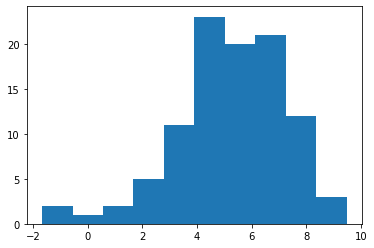

In [163]:
plt.hist(x)
np.mean(x)
np.std(x)

(array([ 3., 16., 39., 32.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

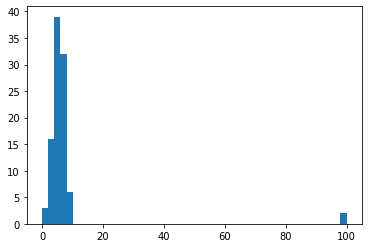

In [169]:
x[98:]=100
x
np.mean(x)
np.std(x)
# plt.hist(x)
plt.hist(x, bins=np.arange(0,102,2)) # bins => 구간을 2씩 나눔

(array([96.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.65529231,  0.1027834 ,  0.86085911,  1.61893482,  2.37701053,
         3.13508623,  3.89316194,  4.65123765,  5.40931336,  6.16738907,
         6.92546477]),
 <a list of 10 Patch objects>)

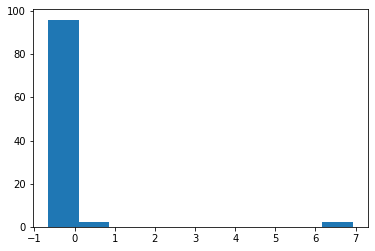

In [180]:
# type(x) -> array
# x=x.reshape(100,1) # (100,) -> (100,1)
x=x.reshape(-1,1)
x.shape
ss_x=StandardScaler().fit_transform(x)
np.mean(ss_x)
np.std(ss_x)
plt.hist(ss_x)

(array([ 0.,  0.,  0.,  1.,  2.,  2.,  8., 19., 26., 23., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

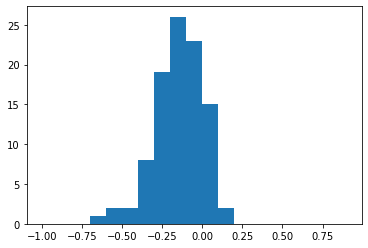

In [186]:
ss_x_z=ss_x[ss_x<5]
plt.hist(ss_x_z, bins=np.arange(-1,1,0.1))

In [197]:
# 이상치 포함 데이터의 중앙값, IQR을 이용 -> 표준화
np.median(x)
q1=np.percentile(x,25) # 1사분 위수 4.177
q3=np.percentile(x,75) # 3사분 위수 6.700
iqr=q3-q1 # 6.700-4.177
iqr

2.52336260215146

(array([2., 0., 3., 5., 5., 6., 4., 5., 5., 4., 6., 4., 6., 6., 3., 5., 4.,
        4., 4.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

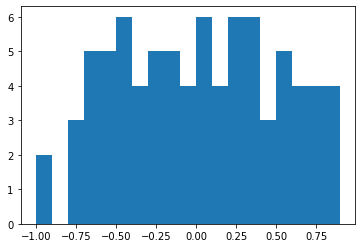

In [206]:
x_rs=RobustScaler().fit_transform(x)
x_rs
np.mean(x_rs) # 0
np.median(x_rs) # -1.7
np.std(x_rs) # 5.3
#plt.hist(x_rs)
x_rs_z=x_rs[x_rs<10]
plt.hist(x_rs_z, bins=np.arange(-1,1,0.1))